# Count Prediction for Bikes at rent, then using that count to set the rent.

## Import important libraries and  modules

In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

### Loading data

In [2]:
train = pd.read_csv("C:\\Users\\TAMANNA\\Downloads\\bike-train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("C:\\Users\\TAMANNA\\Downloads\\bike-test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
train.shape

(10886, 12)

In [5]:
train['datetime']=pd.to_datetime(train['datetime']) #change datetime columns type to datetime

In [6]:
#train['date']= train['datetime'].apply(lambda X: X.date())

In [7]:
train['month']= train['datetime'].apply(lambda X: X.month) # to get the month column

In [9]:
# changing datatype of each column to make it more accessable/readable
train['month'].astype('int')
train['season']=train.season.astype('category')
train['holiday']=train.holiday.astype('category')
train['workingday']=train.workingday.astype('category')
train['weather']=train.weather.astype('category')
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12


<AxesSubplot:xlabel='holiday', ylabel='count'>

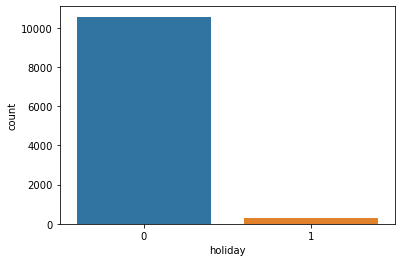

In [10]:
# plot between holiday category 0 -> no holiday, 1 -> holiday
sns.countplot(x=train['holiday'], data=train)

In [11]:
train['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='count'>

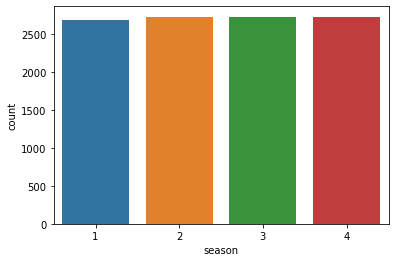

In [12]:
# countplot of different seasons of year 
sns.countplot(x=train['season'], data=train)

<AxesSubplot:xlabel='workingday', ylabel='count'>

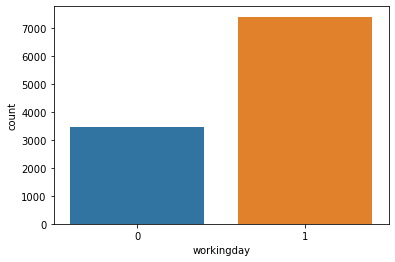

In [13]:
# plot of workingdays 0-> no workingday, 1->workingday
sns.countplot(x=train['workingday'], data=train)

<AxesSubplot:xlabel='weather', ylabel='count'>

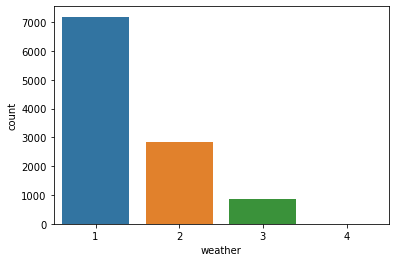

In [14]:
# plot for different categories of weather
sns.countplot(x=train['weather'], data=train)

<AxesSubplot:xlabel='temp', ylabel='count'>

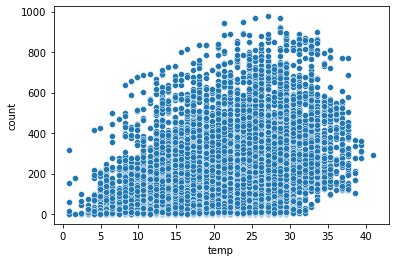

In [15]:
# relation between temperature and bookings
sns.scatterplot(x=train['temp'],y=train['count'])

<AxesSubplot:xlabel='windspeed', ylabel='count'>

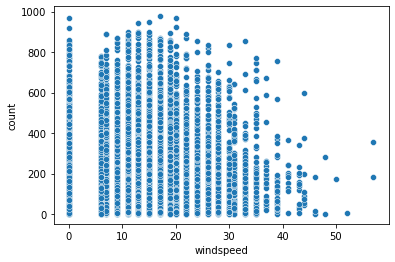

In [16]:
# plot between windspeed and bookings
sns.scatterplot(x=train['windspeed'],y=train['count'])

## getting dummy columns for data - One Hot Encoding

In [17]:
train_attributes=train[['holiday','workingday','weather']]
cat_attributes=['holiday','workingday','weather']

In [18]:
train_dummies=pd.get_dummies(train_attributes,columns=cat_attributes)
train_dummies.head(5)

,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
0,1,0,1,0,1,0,0,0
1,1,0,1,0,1,0,0,0
2,1,0,1,0,1,0,0,0
3,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,0


In [19]:
df_with_dummies = pd.concat([train,train_dummies],axis='columns')
df_with_dummies.drop(['datetime','workingday','season','holiday','weather','casual','registered','season'],axis=1,inplace=True)

In [55]:
X = df_with_dummies.drop(['count'],axis=1)
y = df_with_dummies['count']

## Model 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

## Prediction

In [23]:
pred = lr.predict(X_test)
pred

array([190.62597081, 187.84955585, 134.03911512, ..., 136.14812626,
       180.49493659, 222.25552122])

In [24]:
X_train.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'month', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1', 'weather_1', 'weather_2',
       'weather_3', 'weather_4'],
      dtype='object')

In [25]:
X_test.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'month', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1', 'weather_1', 'weather_2',
       'weather_3', 'weather_4'],
      dtype='object')

In [26]:
lr.predict([[40,50,30,20,6,0,1,0,1,0,0,1,0]])

array([463.32953686])

## Predicting for test data

In [27]:
test['datetime']=pd.to_datetime(test['datetime'])
test['month']= test['datetime'].apply(lambda X: X.month)
test['month'].astype('int')
test.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1


### Making test data ready for prediction

In [28]:
test['season']=test.season.astype('category')
test['holiday']=test.holiday.astype('category')
test['workingday']=test.workingday.astype('category')
test['weather']=test.weather.astype('category')
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1
...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,12
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,12
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,12
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,12


In [29]:
train_attributes=train[['holiday','workingday','weather']]
cat_attributes=['holiday','workingday','weather']

In [30]:
test_dummies=pd.get_dummies(train_attributes,columns=cat_attributes)
test_dummies.head(5)

,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
0,1,0,1,0,1,0,0,0
1,1,0,1,0,1,0,0,0
2,1,0,1,0,1,0,0,0
3,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,0


In [31]:
X1 = pd.concat([test,test_dummies],axis='columns')
X1.head()
X1.drop(['datetime','workingday','season','holiday','weather','season'],axis=1,inplace=True)

In [32]:
X1.head()

,temp,atemp,humidity,windspeed,month,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
0,10.66,11.365,56.0,26.0027,1.0,1,0,1,0,1,0,0,0
1,10.66,13.635,56.0,0.0000,1.0,1,0,1,0,1,0,0,0
2,10.66,13.635,56.0,0.0000,1.0,1,0,1,0,1,0,0,0
3,10.66,12.880,56.0,11.0014,1.0,1,0,1,0,1,0,0,0
4,10.66,12.880,56.0,11.0014,1.0,1,0,1,0,1,0,0,0


In [33]:
# dropping null values 
X1.dropna(inplace=True)
X1.shape

(6493, 13)

### Making prediction for test data

In [34]:
X1['count'] = lr.predict(X1)

In [35]:
avgc = round(X1['count'].mean())
avgc

186

In [37]:
X1['count'] = X1['count'].apply(lambda X: round(X))

In [38]:
X1

,temp,atemp,humidity,windspeed,month,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4,count
0,10.66,11.365,56.0,26.0027,1.0,1,0,1,0,1,0,0,0,84
1,10.66,13.635,56.0,0.0000,1.0,1,0,1,0,1,0,0,0,78
2,10.66,13.635,56.0,0.0000,1.0,1,0,1,0,1,0,0,0,78
3,10.66,12.880,56.0,11.0014,1.0,1,0,1,0,1,0,0,0,81
4,10.66,12.880,56.0,11.0014,1.0,1,0,1,0,1,0,0,0,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,10.66,12.880,60.0,11.0014,12.0,1,0,0,1,1,0,0,0,153
6489,10.66,12.880,60.0,11.0014,12.0,1,0,0,1,1,0,0,0,153
6490,10.66,12.880,60.0,11.0014,12.0,1,0,0,1,1,0,0,0,153
6491,10.66,13.635,56.0,8.9981,12.0,1,0,0,1,1,0,0,0,169


In [39]:
len(X1['count'])

6493

## according to count prediction of rented bikes seting rent
- increasing or decreasing rent according to % value of rented bike counts with average counts

In [53]:
for i in range(len(X1['count'])):
    diff = abs(avgc-X1['count'][i])
    perr = round((diff/avgc)*100)
    if (X1['count'][i]>=avgc):
        X1['rent'][i]=100+perr
    else:
        X1['rent'][i]=100-perr

C:\Users\TAMANNA\AppData\Local\Temp/ipykernel_6800/2276038770.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['rent'][i]=100-perr
C:\Users\TAMANNA\AppData\Local\Temp/ipykernel_6800/2276038770.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['rent'][i]=100+perr


In [54]:
X1

,temp,atemp,humidity,windspeed,month,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4,count,rent
0,10.66,11.365,56.0,26.0027,1.0,1,0,1,0,1,0,0,0,84,45
1,10.66,13.635,56.0,0.0000,1.0,1,0,1,0,1,0,0,0,78,42
2,10.66,13.635,56.0,0.0000,1.0,1,0,1,0,1,0,0,0,78,42
3,10.66,12.880,56.0,11.0014,1.0,1,0,1,0,1,0,0,0,81,44
4,10.66,12.880,56.0,11.0014,1.0,1,0,1,0,1,0,0,0,81,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,10.66,12.880,60.0,11.0014,12.0,1,0,0,1,1,0,0,0,153,82
6489,10.66,12.880,60.0,11.0014,12.0,1,0,0,1,1,0,0,0,153,82
6490,10.66,12.880,60.0,11.0014,12.0,1,0,0,1,1,0,0,0,153,82
6491,10.66,13.635,56.0,8.9981,12.0,1,0,0,1,1,0,0,0,169,91
